## Heat Equation

The 1-dimentional Heat equation describes the variation in temperature with time and distance along a 1-dimensional object like a long thin bar. It is a partial differential equation in time, $t$, and position, 
$$\frac{\partial T(t,x)}{\partial t}
=
\kappa \, \frac{\partial^2 T(t,x)}{\partial x^2}$$

Based on the discussion of the Heat Equation in class, develop the following code to solve the time varying temperature along a 15cm rod starting at a uniform 50°C with one end in boiling water and one end in ice water. The heat constant is specified as 0.5 in the code. 

The Heat Equation is discretized as 
<br>
$$
T_{i\:}=T_{i-1}+\kappa\frac{\Delta t}{\Delta x^2}DT_{i-1}=\left[I+\kappa\frac{\Delta t}{\Delta x^2}D\right]T_{i-1}=MT_{i-1}
$$
Where T is the vector of temperature values along the rod at positions  $x_0,x_1,x_2,...,x_n$ and $D$ is the tridiabonal matrix
<br>
\begin{equation}
D=\begin{bmatrix}
-2 & 1& 0 & 0 & \cdots & 0& 0 \\
1 & -2 & 1& 0 & \cdots & 0 & 0\\
0 &1 & -2 & 1& \cdots & 0 & 0\\
0 & 0 &1 & -2 & \cdots & 0 & 0\\
\vdots  & \vdots & \vdots & \vdots  & \ddots & \vdots & \vdots  \\
0&0 & 0 & 0&\cdots & -2 & 1 \\
0&0 & 0 & 0&\cdots & 1 & -2 
\end{bmatrix}
\end{equation}
<br>


Import modules

In [1]:
from numpy import linspace,array, log,exp,sin,cos,sqrt, pi,e
import numpy as np
from numpy import zeros, diagflat, ones, eye, matmul
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show,figure,title, pause
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Set some parameters for the problem

In [2]:
# Parameters for the problem 
K = 0.5 # heat conduction K = 0.5

Create an array of x values spaced evenly along the bar. This is the "spatial grid"

In [ ]:
# Spatial Grid
L = 15.  # Length of bar
dx = 0.1 # Spacing of points on bar

nx =  # fill in
x =  # fill in

Create an array of t values spaced evenly in time for 20 seconds. This is the "temporal grid"

In [ ]:
# Time grid
stopTime = 40 # Time to run the simulation
dt = .01 # Size of time step
nt =  # fill in

time = # fill in

# Create empty array to contain T(t,x)
T = zeros() # nt times, nx positions

Set the intial conditions for the temperature:
50°C in center of bar
100°C at left end
0°C at right end

In [ ]:
# Set the initial condition at t=0
T[0,:] = 50. # uniform initial state

# Boundary Condition at x[0] and x[-1]
Ta = 100. # left side
Tb = 0. # right side

# Apply boundary conditions at time 0
# Fill in T
T[] = Ta # fixed temperature
T[] = Tb # fixed temperature

Now form the matrix M defined above. Use the eye function to make the diagonals.

In [ ]:
# Create Matrix for iterating forward in time
Tdiag = # fill in

M = # fill in

In [29]:
print(M[:4,:4])

[[2.22044605e-16 5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [5.00000000e-01 2.22044605e-16 5.00000000e-01 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 2.22044605e-16 5.00000000e-01]
 [0.00000000e+00 0.00000000e+00 5.00000000e-01 2.22044605e-16]]


Now we just loop forward in time along our "temporal grid" and use M to compute the next time from the previous. Notice how the boundary conditions are re-applied at each time step to keep the boundaries from changing.

In [ ]:
# loop forward in time and compute change in string
for it in range(1,nt):
    # Calculate the future temperature along the bar
    
    # center of bar in matrix form.    
    T[] = # fill in using matmul
    
    # apply left side boundary condition
    T[] = # fill in
    
    # apply right side boundary condition
    T[] = # fill in


Now make some plots

In [31]:
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show,figure,title, pause, subplots, ylim, xlim
from matplotlib import cm

First plot the temperature at the end of our simulation. If we ran it long enough, this is the steady-state solution.

(0.0, 15.0)

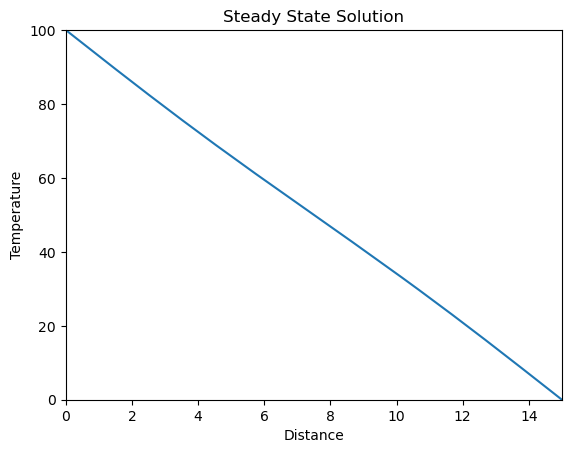

In [32]:
figure(1)
plot(x, T[-1,:])
xlabel('Distance')
ylabel('Temperature')
title('Steady State Solution')
ylim([0,100])
xlim([0,L])

(0.0, 15.0)

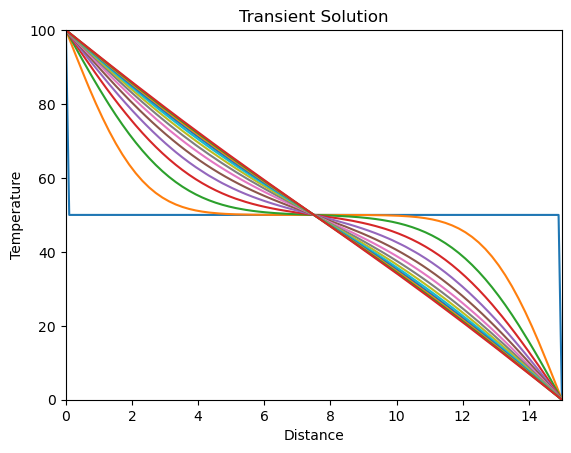

In [33]:
# Graph for every 300 time steps
figure(2)
plot(x, T.T[:, ::300]) 
  #note need to take transpose of T to match first dimensions of x and T
xlabel('Distance')
ylabel('Temperature')
title('Transient Solution')
ylim([0,100])
xlim([0,L])


Now make a 3-D surface plot of the temperature vs position and time

Text(0.5, 0.5, 'Time (s)')

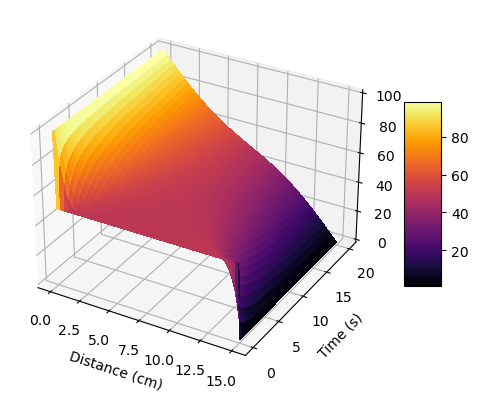

In [11]:
fig = figure(3)
ax = fig.add_subplot(projection='3d')

# Make data.
X, Y = np.meshgrid(x,time)

# Plot the surface.
surf = ax.plot_surface(X, Y, T, cmap=cm.inferno,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
xlabel('Distance (cm)')
ylabel('Time (s)')